In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.optim import lr_scheduler
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import time
import os
from tempfile import TemporaryDirectory
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.metrics.road import ROADMostRelevantFirst
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import torch
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
data_dir = '/home/natthakit/304proj/dataset'


## resnet50

In [2]:
# Load the entire model
resnet50_model = torch.load('saved/resnet50_full_model.pth')
resnet50_model = resnet50_model.to(device)  # Move to the correct device

In [18]:
def resnet50_gradcam(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')

    target_layers = [resnet50_model.layer4[-1]]

    # Preprocessing (ensure it matches what was used during training)
    preprocess = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    input_tensor = preprocess(image).unsqueeze(0).to(device)

    rgb_img = np.array(image.resize((224, 224))) / 255.0 

    # Create the CAM object and generate the heatmap
    with GradCAM(model=resnet50_model, target_layers=target_layers) as cam:
        # Generate the grayscale CAM
        grayscale_cam = cam(input_tensor=input_tensor, aug_smooth=True, eigen_smooth=True)[0, :]
        
        # Overlay the CAM on the original image
        visualization = show_cam_on_image(rgb_img.astype(np.float32), grayscale_cam, use_rgb=True)

    # Display or save the visualization image as needed
    plt.imshow(visualization)
    plt.axis('off')
    plt.show()


## maxvit-T

In [4]:
# Load the entire model
maxvit_model = torch.load('saved/maxvit_T_full_model.pth')
maxvit_model = maxvit_model.to(device)  # Move to the correct device

In [192]:
def maxvitT_gradcam(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
        
    target_layers = [maxvit_model.blocks[-1].layers[1]]

    preprocess = transforms.Compose([
    transforms.Resize(224, interpolation=transforms.InterpolationMode.BICUBIC),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    input_tensor = preprocess(image).unsqueeze(0).to(device)

    targets = [ClassifierOutputTarget(0)]  # Replace 281 with your specific target class

    rgb_img = np.array(image.resize((224, 224))) / 255.0  # Resize to match the crop size and normalize

    with GradCAM(model=maxvit_model, target_layers=target_layers) as cam:
        # Generate the grayscale CAM
        grayscale_cam = cam(input_tensor=input_tensor, targets=targets,aug_smooth=True, eigen_smooth=True)[0, :]
        
        # Overlay the CAM on the original image
        visualization = show_cam_on_image(rgb_img.astype(np.float32), grayscale_cam, use_rgb=True)

    # Display or save the visualization image as needed
    plt.imshow(visualization)
    plt.axis('off')
    plt.show()

# p1 = Image.open('crop_dataset/val/pituitary/225.jpg')
# maxvitT_gradcam(p1)

## EfficientNetV2 small

In [6]:
eff_s_model = torch.load('saved/eff_s_full_model.pth')
eff_s_model = eff_s_model.to(device)  # Move to the correct device

In [102]:
def effs_gradcam(image):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    target_layers = [eff_s_model.features[-2]]

    preprocess = transforms.Compose([
        transforms.Resize(256, interpolation=transforms.InterpolationMode.BICUBIC),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    input_tensor = preprocess(image).unsqueeze(0).to(device)


    rgb_img = np.array(image.resize((224, 224))) / 255.0  # Resize to match the crop size and normalize

    # Create the CAM object and generate the heatmap
    with GradCAM(model=eff_s_model, target_layers=target_layers) as cam:
        # Generate the grayscale CAM
        grayscale_cam = cam(input_tensor=input_tensor,aug_smooth=True, eigen_smooth=True)[0, :]
        
        # Overlay the CAM on the original image
        visualization = show_cam_on_image(rgb_img.astype(np.float32), grayscale_cam, use_rgb=True)

    # Display or save the visualization image as needed
    plt.imshow(visualization)
    plt.axis('off')
    plt.show()

## predict

### glioma

resnet50


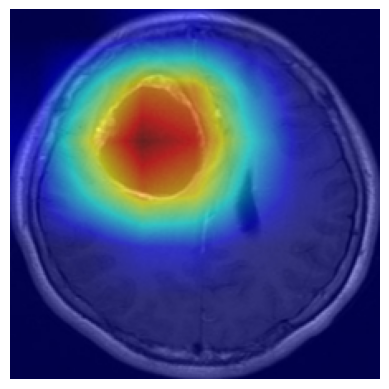

maxvit


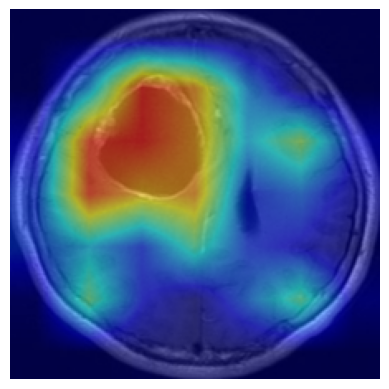

eff_s


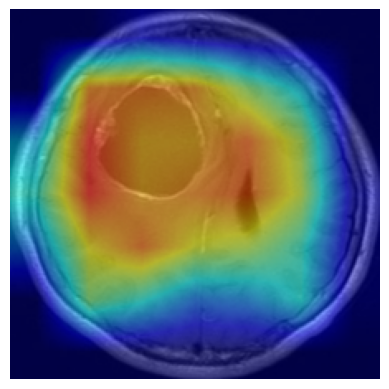

In [34]:
g1 = Image.open('/home/natthakit/304proj/crop_dataset/train/glioma/38.jpg')
print('resnet50')
resnet50_gradcam(g1)
print('maxvit')
maxvitT_gradcam(g1)
print('eff_s')
effs_gradcam(g1)

resnet50


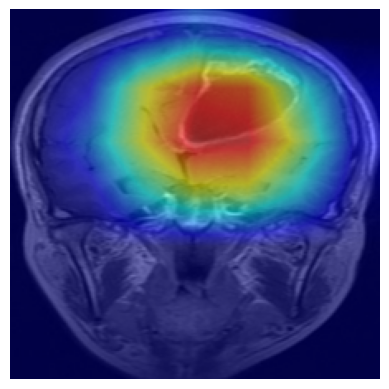

maxvit


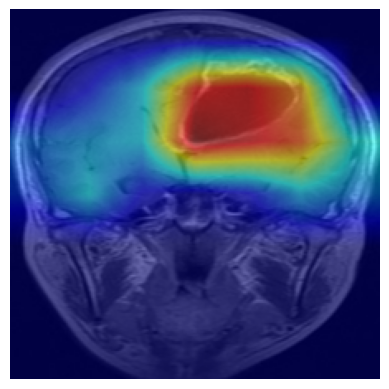

eff_s


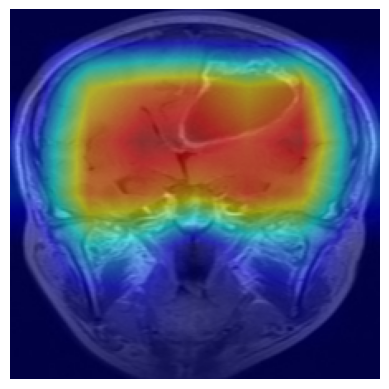

In [39]:
g2 = Image.open('/home/natthakit/304proj/crop_dataset/val/glioma/74.jpg')
print('resnet50')
resnet50_gradcam(g2)
print('maxvit')
maxvitT_gradcam(g2)
print('eff_s')
effs_gradcam(g2)

resnet50


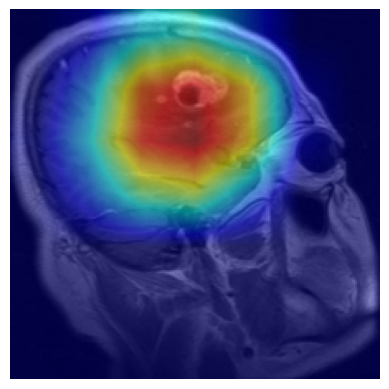

maxvit


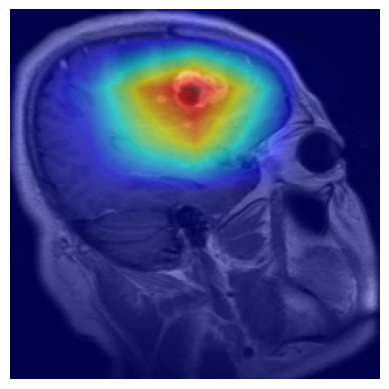

eff_s


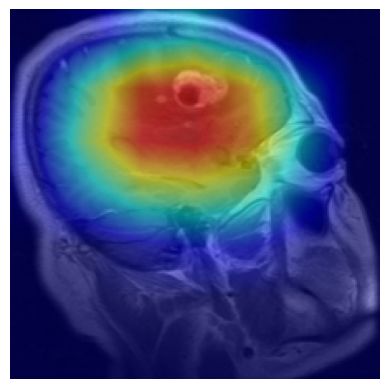

In [37]:
g3 = Image.open('/home/natthakit/304proj/crop_dataset/test/glioma/67.jpg')
print('resnet50')
resnet50_gradcam(g3)
print('maxvit')
maxvitT_gradcam(g3)
print('eff_s')
effs_gradcam(g3)

### meningioma

resnet50


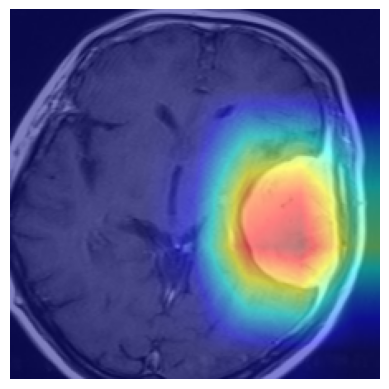

maxvit


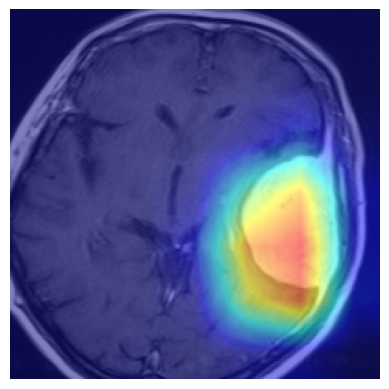

eff_s


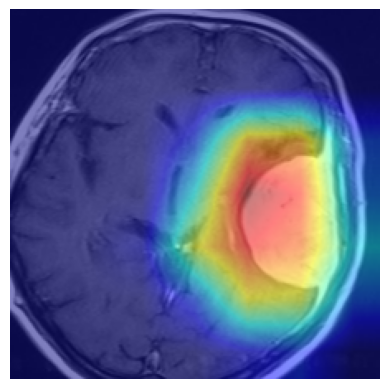

In [40]:
m1 = Image.open('/home/natthakit/304proj/dataset/val/meningioma/Te-me_0012.jpg')
print('resnet50')
resnet50_gradcam(m1)
print('maxvit')
maxvitT_gradcam(m1)
print('eff_s')
effs_gradcam(m1)

resnet50


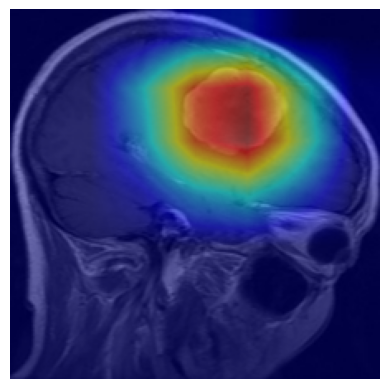

maxvit


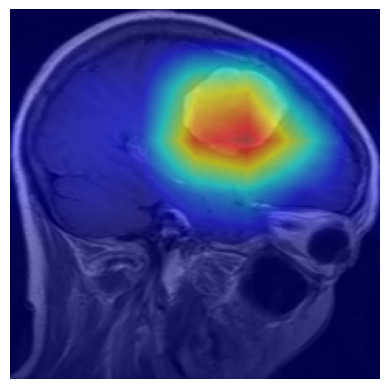

eff_s


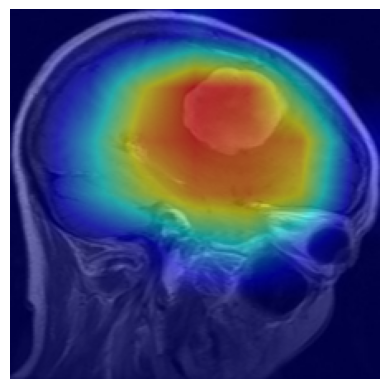

In [100]:
m2 = Image.open('crop_dataset/val/meningioma/277.jpg')
print('resnet50')
resnet50_gradcam(m2)
print('maxvit')
maxvitT_gradcam(m2)
print('eff_s')
effs_gradcam(m2)

resnet50


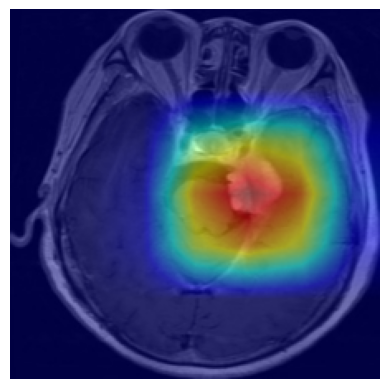

maxvit


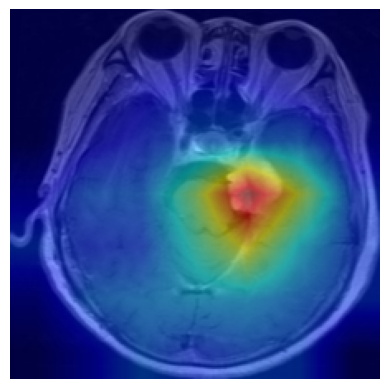

eff_s


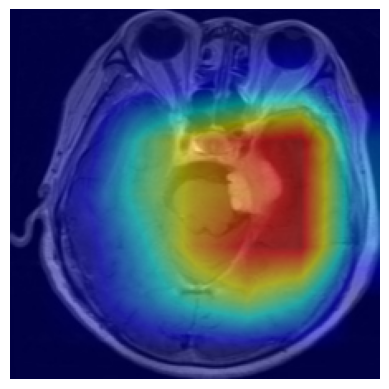

In [112]:
m3 = Image.open('crop_dataset/train/meningioma/1323.jpg')
print('resnet50')
resnet50_gradcam(m3)
print('maxvit')
maxvitT_gradcam(m3)
print('eff_s')
effs_gradcam(m3)

## notumor

resnet50


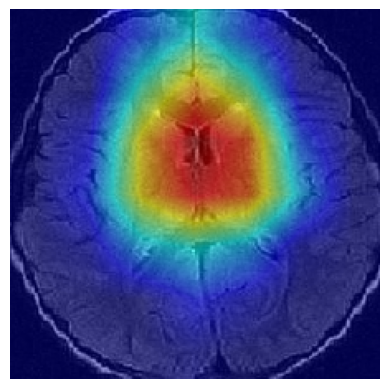

maxvit


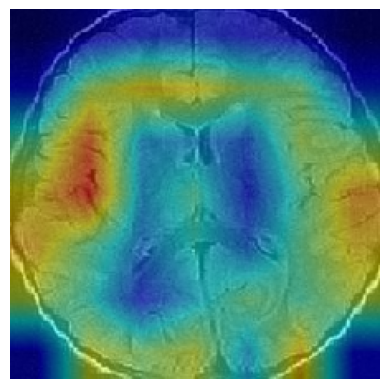

eff_s


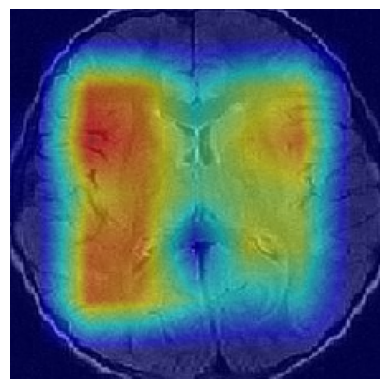

In [116]:
nt1 = Image.open('/home/natthakit/304proj/crop_dataset/train/notumor/1534.jpg')
print('resnet50')
resnet50_gradcam(nt1)
print('maxvit')
maxvitT_gradcam(nt1)
print('eff_s')
effs_gradcam(nt1)

resnet50


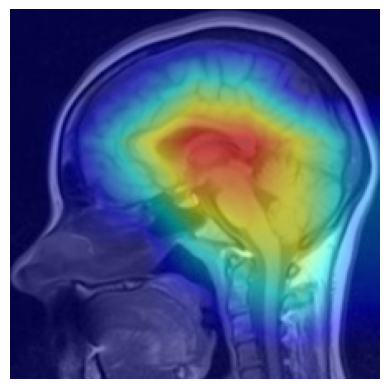

maxvit


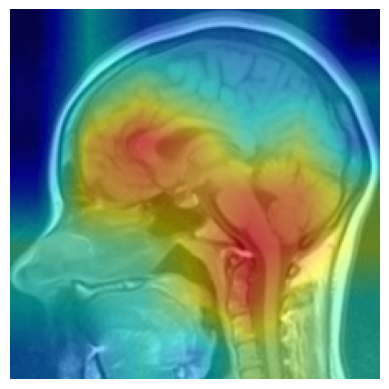

eff_s


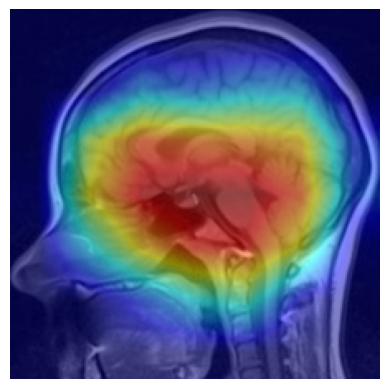

In [117]:
nt2 = Image.open('/home/natthakit/304proj/crop_dataset/train/notumor/1558.jpg')
print('resnet50')
resnet50_gradcam(nt2)
print('maxvit')
maxvitT_gradcam(nt2)
print('eff_s')
effs_gradcam(nt2)

resnet50


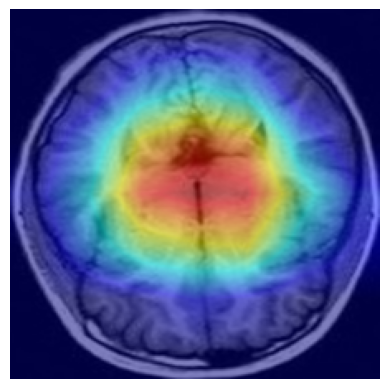

maxvit


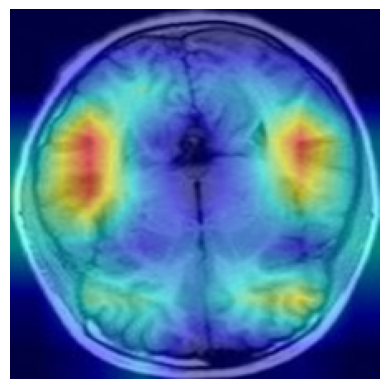

eff_s


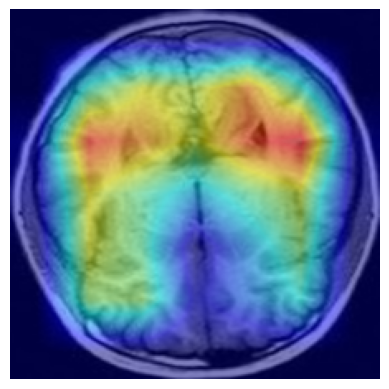

In [119]:
nt3 = Image.open('crop_dataset/val/notumor/391.jpg')
print('resnet50')
resnet50_gradcam(nt3)
print('maxvit')
maxvitT_gradcam(nt3)
print('eff_s')
effs_gradcam(nt3)

## pituitary

resnet50


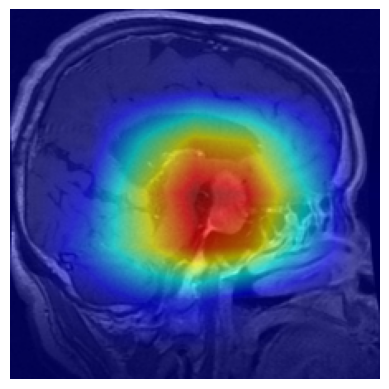

maxvit


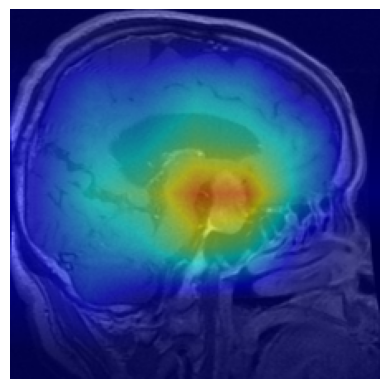

eff_s


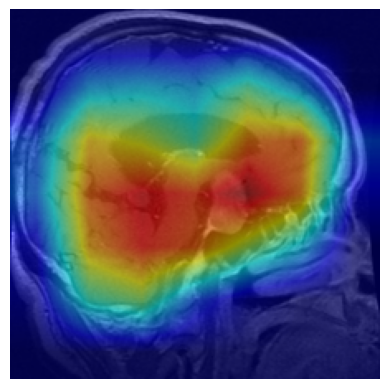

In [180]:
p2 = Image.open('crop_dataset/val/pituitary/256.jpg')
print('resnet50')
resnet50_gradcam(p2)
print('maxvit')
maxvitT_gradcam(p2)
print('eff_s')
effs_gradcam(p2)

resnet50


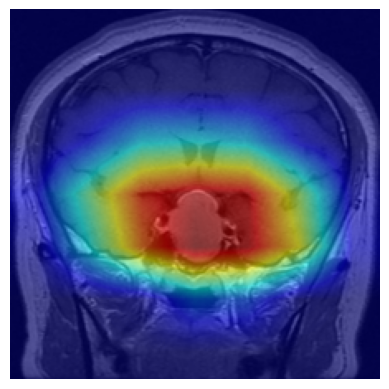

maxvit


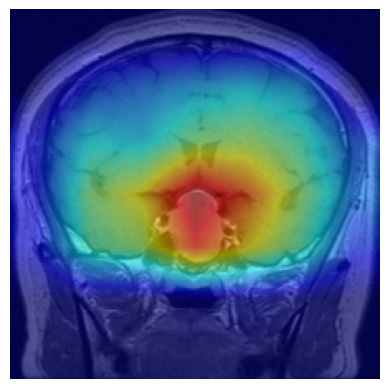

eff_s


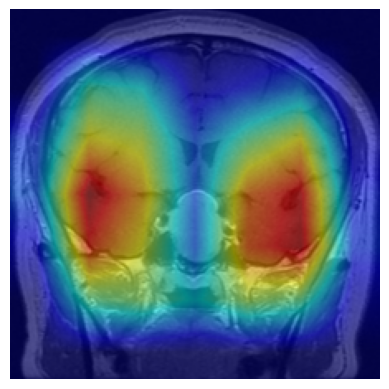

In [182]:
p3 = Image.open('crop_dataset/val/pituitary/264.jpg')
print('resnet50')
resnet50_gradcam(p3)
print('maxvit')
maxvitT_gradcam(p3)
print('eff_s')
effs_gradcam(p3)

resnet50


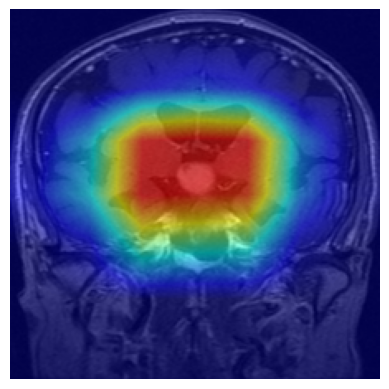

maxvit


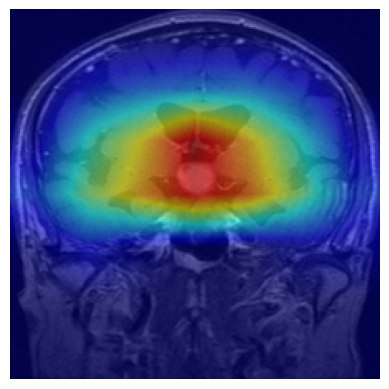

eff_s


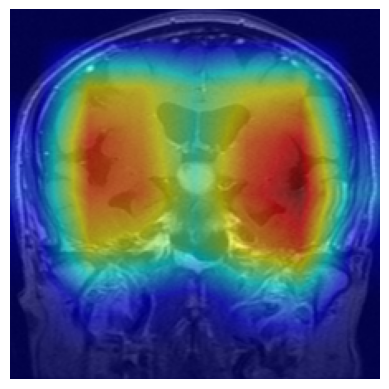

In [191]:
p1 = Image.open('crop_dataset/val/pituitary/225.jpg')
print('resnet50')
resnet50_gradcam(p1)
print('maxvit')
maxvitT_gradcam(p1)
print('eff_s')
effs_gradcam(p1)